In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset
df = pd.read_csv("/content/graduation_project_database.csv")

In [3]:
df.head()

,task_id,team_id,task_deadline,task_status,task_updated_at,task_created_at,team_name,member_id,meeting_attendance_status,meeting.meeting_id,meeting.team_id,student_id
0,1,5,2024-04-11,pending,2024-09-25 00:00:00,2024-07-09 00:00:00,Team_2,1,absent,17,8,49
1,2,8,2024-03-09,completed,2024-06-19 00:00:00,2024-06-12 00:00:00,Team_6,85,attended,16,9,44
2,3,6,2024-01-30,in_progress,2024-03-18 00:00:00,2024-03-03 00:00:00,Team_8,16,attended,2,10,9
3,4,3,2024-04-20,in_progress,2024-06-03 00:00:00,2024-05-03 00:00:00,Team_10,35,absent,20,4,26
4,5,10,2024-05-08,pending,2024-03-18 00:00:00,2024-09-10 00:00:00,Team_4,7,attended,2,3,59


In [4]:
df.tail()

,task_id,team_id,task_deadline,task_status,task_updated_at,task_created_at,team_name,member_id,meeting_attendance_status,meeting.meeting_id,meeting.team_id,student_id
45,46,4,2024-04-08,in_progress,2024-02-22 00:00:00,2024-04-07 00:00:00,Team_6,94,attended,9,2,91
46,47,5,2024-02-10,pending,2024-05-09 00:00:00,2024-02-07 00:00:00,Team_6,42,attended,16,1,2
47,48,4,2024-04-09,completed,2024-01-06 00:00:00,2024-10-07 00:00:00,Team_6,62,attended,12,5,21
48,49,1,2024-01-12,in_progress,2024-07-19 00:00:00,2024-10-17 00:00:00,Team_2,66,attended,12,7,40
49,50,5,2024-05-16,pending,2024-10-10 00:00:00,2024-07-22 00:00:00,Team_3,20,attended,7,10,60


In [5]:
df.columns

Index(['task_id', 'team_id', 'task_deadline', 'task_status', 'task_updated_at',
       'task_created_at', 'team_name', 'member_id',
       'meeting_attendance_status', 'meeting.meeting_id', 'meeting.team_id',
       'student_id'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   task_id                    50 non-null     int64 
 1   team_id                    50 non-null     int64 
 2   task_deadline              50 non-null     object
 3   task_status                50 non-null     object
 4   task_updated_at            50 non-null     object
 5   task_created_at            50 non-null     object
 6   team_name                  50 non-null     object
 7   member_id                  50 non-null     int64 
 8   meeting_attendance_status  50 non-null     object
 9   meeting.meeting_id         50 non-null     int64 
 10  meeting.team_id            50 non-null     int64 
 11  student_id                 50 non-null     int64 
dtypes: int64(6), object(6)
memory usage: 4.8+ KB


In [7]:
df.describe()

,task_id,team_id,member_id,meeting.meeting_id,meeting.team_id,student_id
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,5.020000,50.420000,10.060000,5.820000,45.840000
std,14.57738,2.567378,29.610457,5.769059,3.061879,31.125395
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,13.25000,3.000000,22.750000,5.000000,3.000000,13.000000
50%,25.50000,5.000000,48.500000,9.500000,6.500000,42.500000
75%,37.75000,6.750000,77.750000,15.000000,9.000000,72.750000
max,50.00000,10.000000,97.000000,20.000000,10.000000,100.000000


In [8]:
# Convert date columnsfrom object to datetime
df["task_created_at"] = pd.to_datetime(df["task_created_at"])
df["task_updated_at"] = pd.to_datetime(df["task_updated_at"])

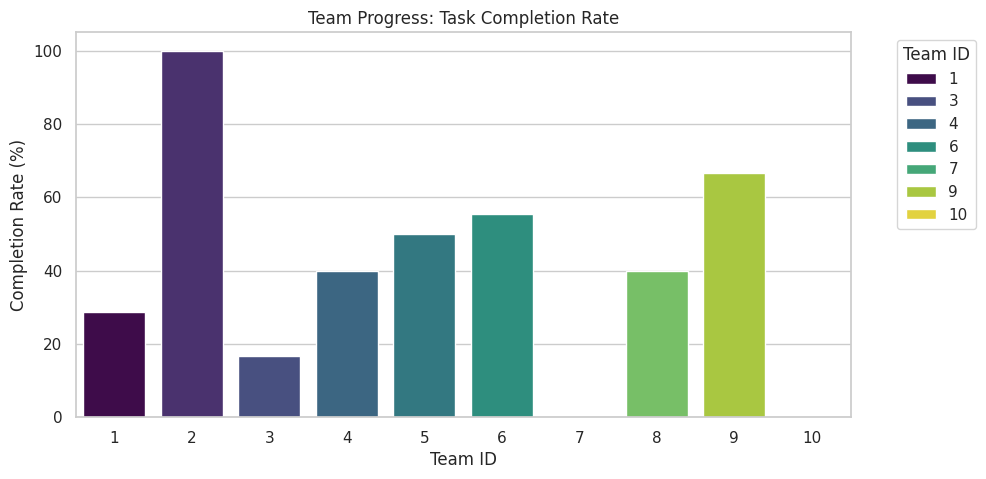

In [9]:
# Set style
sns.set(style="whitegrid")

# this chart will show each team progress
team_progress = df.groupby("team_id")["task_status"].value_counts().unstack().fillna(0)
team_progress["completion_rate"] = (team_progress["completed"] / team_progress.sum(axis=1)) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x=team_progress.index, y=team_progress["completion_rate"], hue=team_progress.index, palette="viridis")
plt.legend(title="Team ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Team Progress: Task Completion Rate")
plt.xlabel("Team ID")
plt.ylabel("Completion Rate (%)")
plt.show()

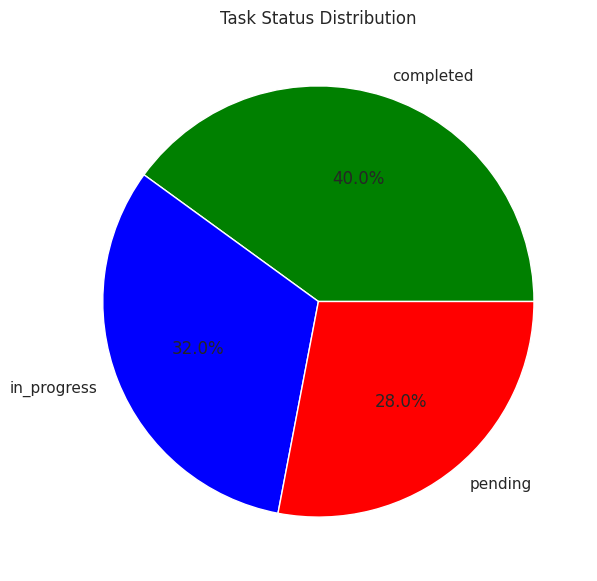

In [10]:
# Task Status Distribution
task_status_counts = df["task_status"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(task_status_counts, labels=task_status_counts.index, autopct="%1.1f%%", colors=["green", "blue", "red"])
plt.title("Task Status Distribution")
plt.show()

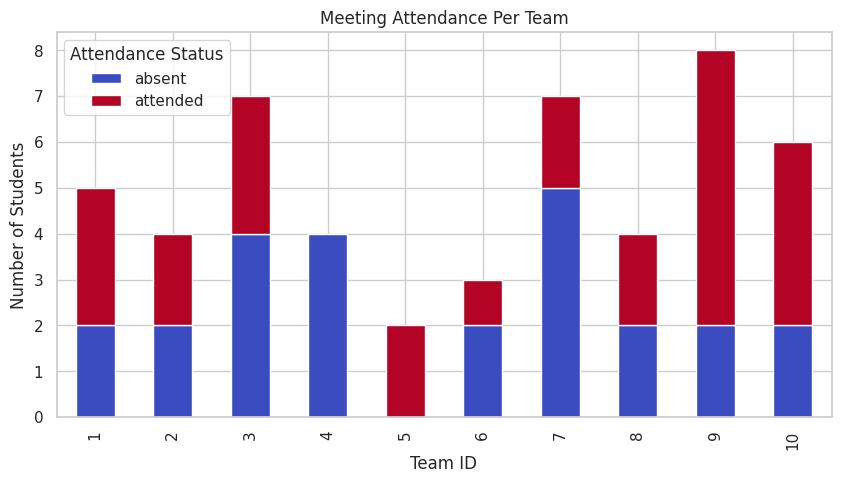

In [11]:
# Meeting Attendance
meeting_attendance = df.groupby(["meeting.team_id", "meeting_attendance_status"]).size().unstack().fillna(0)

meeting_attendance.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")
plt.title("Meeting Attendance Per Team")
plt.xlabel("Team ID")
plt.ylabel("Number of Students")
plt.legend(title="Attendance Status")
plt.show()

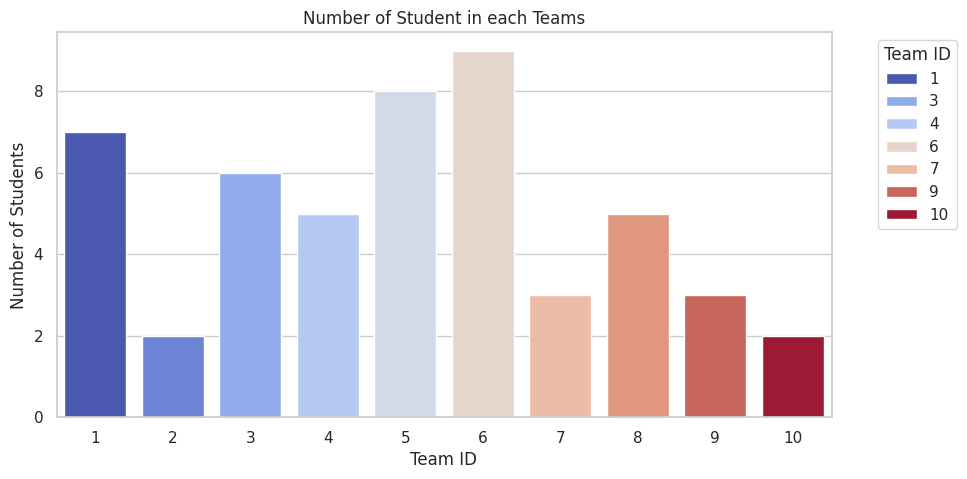

In [12]:
# Student Participation in Teams
team_participation = df.groupby("team_id")["member_id"].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=team_participation.index, y=team_participation.values, palette="coolwarm", hue=team_participation.index)
plt.title("Number of Student in each Teams")
plt.xlabel("Team ID")
plt.legend(title="Team ID", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.ylabel("Number of Students")
plt.show()


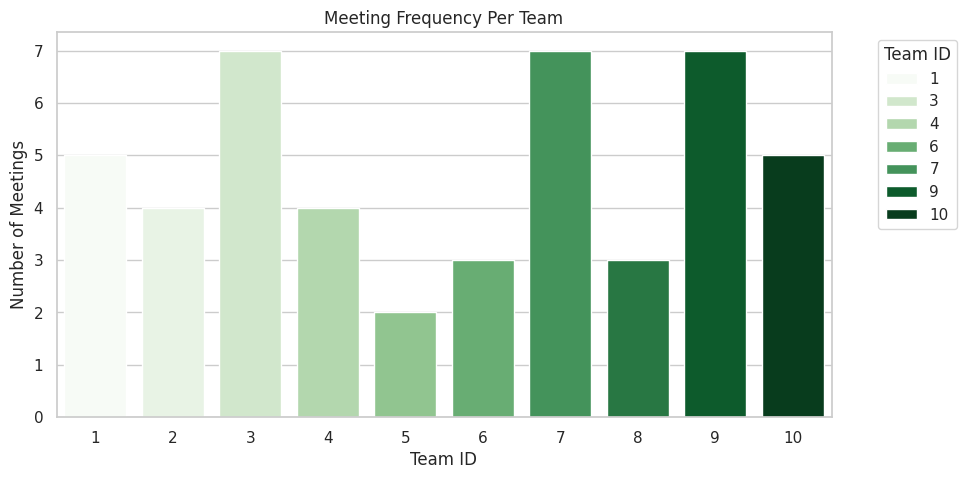

In [13]:
#Meeting Frequency by Team
meeting_frequency = df.groupby("meeting.team_id")["meeting.meeting_id"].nunique()

plt.figure(figsize=(10, 5))
sns.barplot(x=meeting_frequency.index, y=meeting_frequency.values, hue=meeting_frequency.index, palette="Greens" )
plt.legend(title="Team ID", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.title("Meeting Frequency Per Team")
plt.xlabel("Team ID")
plt.ylabel("Number of Meetings")
plt.show()

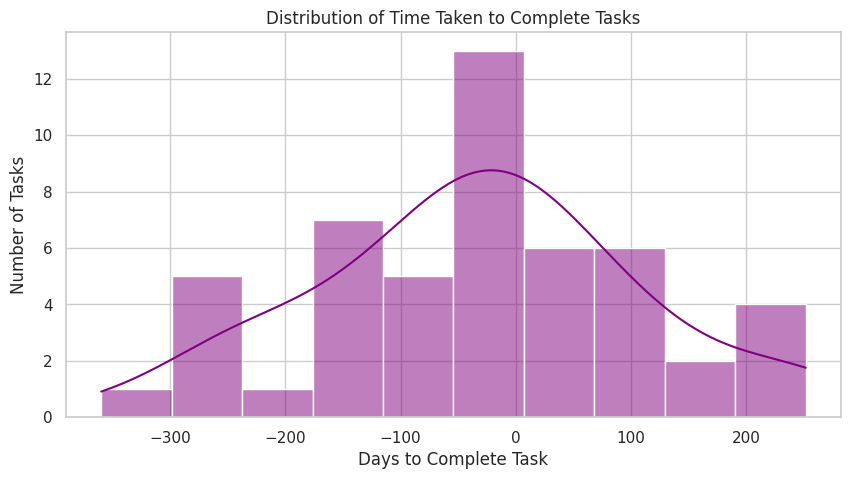

In [14]:
#Time to Complete Tasks
df["task_completion_time"] = (df["task_updated_at"] - df["task_created_at"]).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(df["task_completion_time"], bins=10, kde=True, color="purple")
plt.title("Distribution of Time Taken to Complete Tasks")
plt.xlabel("Days to Complete Task")
plt.ylabel("Number of Tasks")
plt.show()

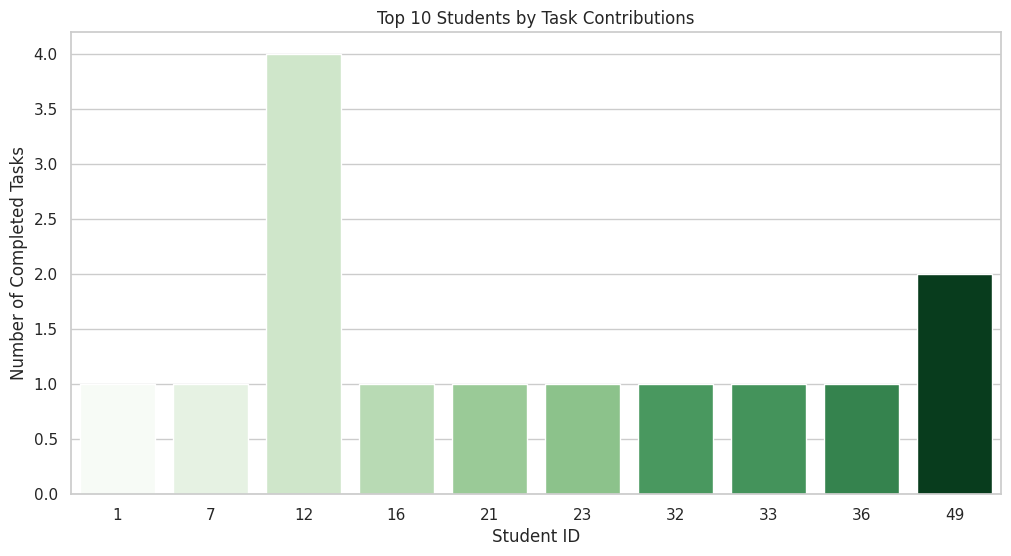

In [15]:
#Student Task Contributions
student_contributions = df[df["task_status"] == "completed"].groupby("student_id").size().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=student_contributions.index, y=student_contributions.values,
            hue=student_contributions.index, palette="Greens", legend=False)
plt.title("Top 10 Students by Task Contributions")
plt.xlabel("Student ID")
plt.ylabel("Number of Completed Tasks")
plt.show()

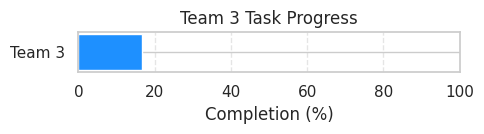

In [16]:
import matplotlib.pyplot as plt

# Select the team to visualize
selected_team_id = 3  # 🔁 Change as needed

# Filter tasks for this team
team_tasks = df[df["team_id"] == selected_team_id].copy()

# Calculate completion rate
total_tasks = len(team_tasks)
completed_tasks = (team_tasks["task_status"] == "completed").sum()
completion_percent = (completed_tasks / total_tasks) * 100 if total_tasks > 0 else 0

# Plot horizontal bar
plt.figure(figsize=(5, 1.5))  # Smaller size
plt.barh([f"Team {selected_team_id}"], [completion_percent], color="dodgerblue")

plt.xlim(0, 100)
plt.xlabel("Completion (%)")
plt.title(f"Team {selected_team_id} Task Progress")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


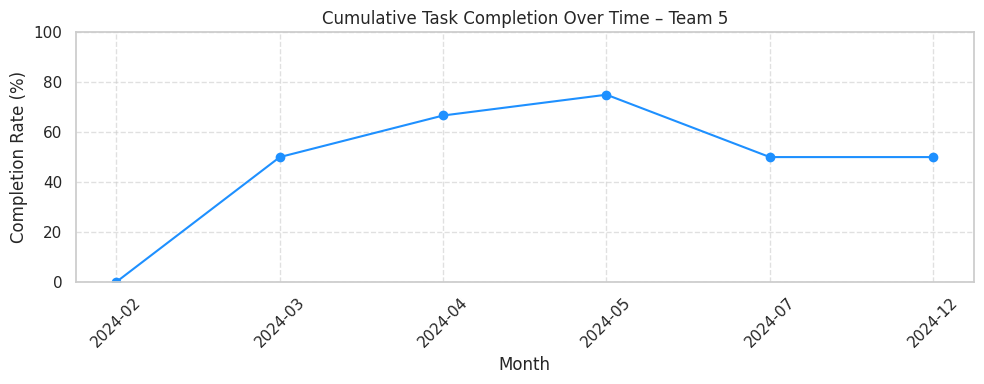

In [17]:
import matplotlib.pyplot as plt

# Select a specific team
selected_team_id = 5  # 🔁 Change this to the desired team ID

# Filter data for that team
team_df = df[df["team_id"] == selected_team_id].copy()

# Ensure datetime format
team_df["task_created_month"] = team_df["task_created_at"].dt.to_period("M")

# Sort by date
team_df.sort_values("task_created_at", inplace=True)

# Initialize list for results
cumulative_stats = []

# Unique sorted months
months = sorted(team_df["task_created_month"].unique())

# Build cumulative data
for month in months:
    up_to_month = team_df[team_df["task_created_month"] <= month]
    total_tasks = len(up_to_month)
    completed_tasks = (up_to_month["task_status"] == "completed").sum()
    completion_rate = (completed_tasks / total_tasks) * 100 if total_tasks > 0 else 0
    cumulative_stats.append((str(month), completion_rate))

# Convert to DataFrame
progress_df = pd.DataFrame(cumulative_stats, columns=["Month", "Completion %"])

# Plot line chart
plt.figure(figsize=(10, 4))
plt.plot(progress_df["Month"], progress_df["Completion %"], marker="o", color="dodgerblue")

plt.title(f"Cumulative Task Completion Over Time – Team {selected_team_id}")
plt.xlabel("Month")
plt.ylabel("Completion Rate (%)")
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
